In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analisis_Cuantitativo/AnalisisCuantitativo_Taller1/data_exam1.xlsx', sheet_name='data1')

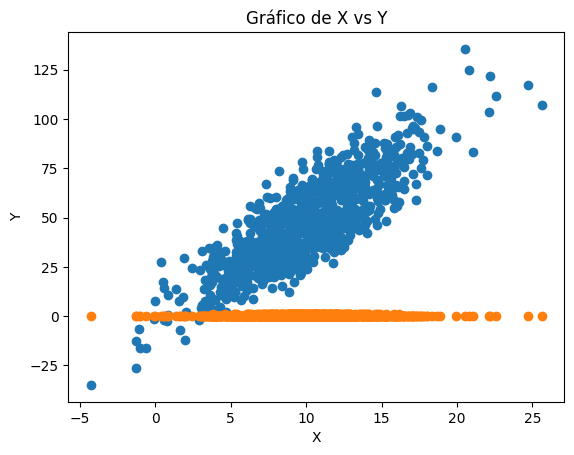

In [ ]:
# Graficar las columnas 'X' y 'Y'
plt.scatter(data1['X'], data1['Y'])
plt.scatter(data1['X'], data1['Ind'])

# Titulos
plt.title('Gráfico de X vs Y')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

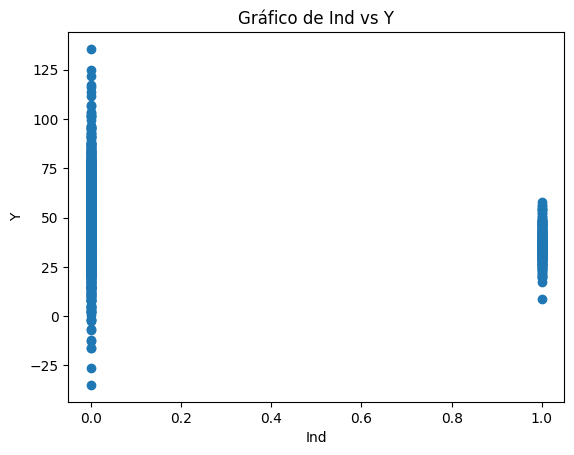

In [ ]:
# Graficar las columnas 'X' y 'Y'
plt.scatter(data1['Ind'], data1['Y'])

# Titulos
plt.title('Gráfico de Ind vs Y')
plt.xlabel('Ind')
plt.ylabel('Y')

plt.show()

In [ ]:
import statsmodels.api as sm

# Prepare the data for the regression
# Add a constant term for the intercept in the model
X = data1[['X', 'Ind']]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(data1['Y'], X).fit()

# Display the summary of the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:                       Y   R-squared:                       0.759
Model:                             OLS   Adj. R-squared:                  0.758
Method:                  Least Squares   F-statistic:                     1566.
Date:              mar., 24 sept. 2024   Prob (F-statistic):          2.25e-308
Time:                         21:11:08   Log-Likelihood:                -3801.1
No. Observations:                 1000   AIC:                             7608.
Df Residuals:                      997   BIC:                             7623.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.424      -1.143       2.718
X              4.9116      0.091     53.848      0.000       4.733       5.091
Ind          -14.1796      0.858    -16.535      0.000     -15.862     -12.497
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='X', ylabel='Y'>

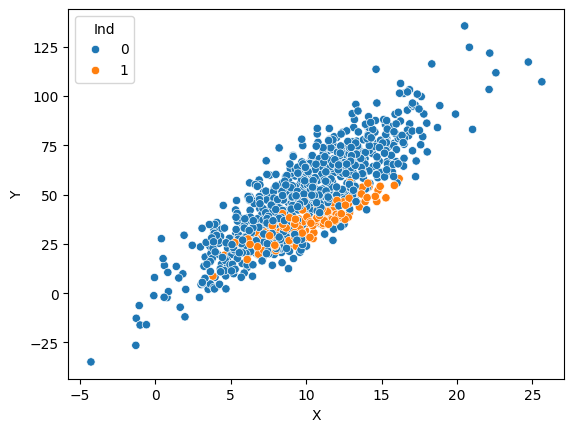

In [ ]:
import seaborn as sns
sns.scatterplot(x='X', y='Y', hue='Ind', data=data1)

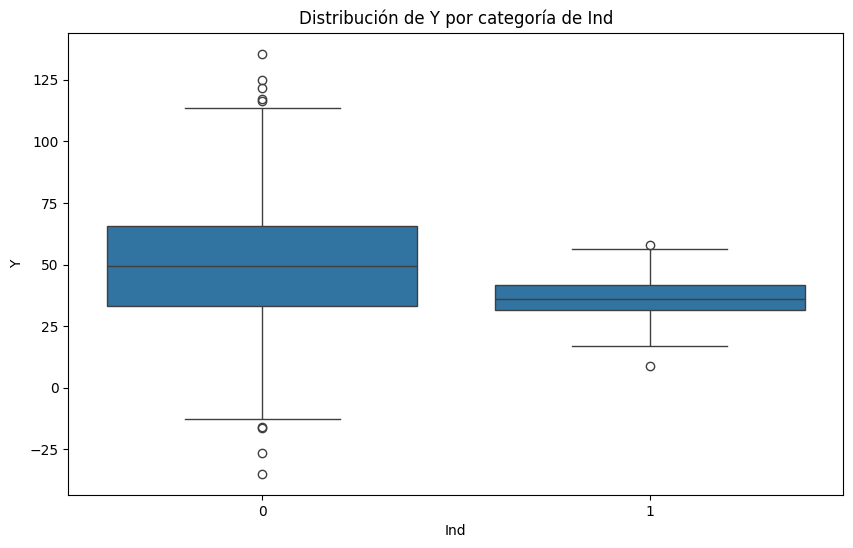

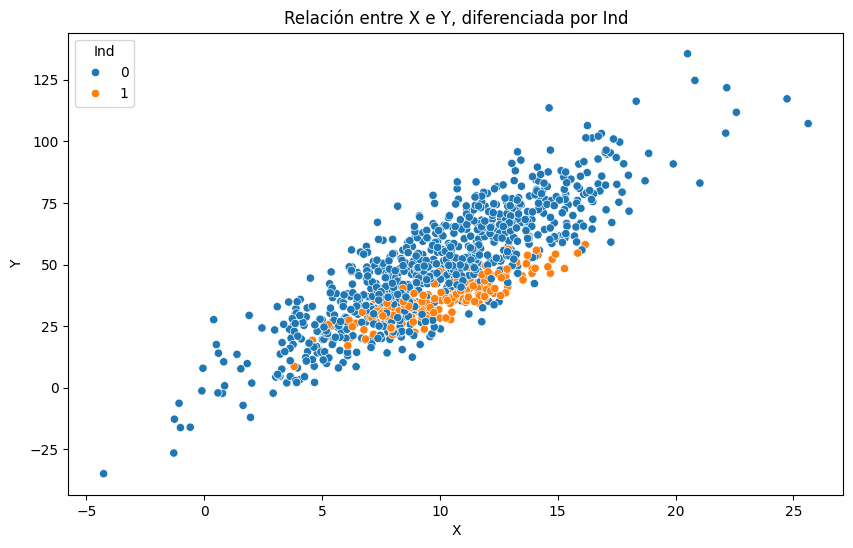

,Y,X,Ind
count,1000.000000,1000.000000,1000.0000
mean,46.953751,9.976858,0.2000
std,22.046143,3.762567,0.4002
min,-34.894319,-4.263757,0.0000
25%,32.427643,7.638899,0.0000
50%,45.460252,9.952888,0.0000
75%,61.587567,12.379984,0.0000
max,135.542574,25.628678,1.0000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
descriptive_stats = data1.describe()

# Boxplot to observe the distribution of Y based on the categorical variable 'Ind'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ind', y='Y', data=data1)
plt.title('Distribución de Y por categoría de Ind')
plt.show()

# Scatter plot of Y vs X, colored by Ind
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Ind', data=data1)
plt.title('Relación entre X e Y, diferenciada por Ind')
plt.show()

descriptive_stats


El análisis exploratorio inicial revela lo siguiente:

Distribución de Y por categoría de Ind:

En el boxplot se observa una diferencia entre las distribuciones de Y según la variable categórica "Ind". Esto sugiere que la variable categórica podría influir en la variable dependiente Y, lo que es un buen indicio para incluirla en un modelo de regresión.
Relación entre X e Y, diferenciada por Ind:

El gráfico de dispersión sugiere que la variable X también tiene una relación con Y, aunque la variabilidad parece cambiar según la categoría de "Ind".
Dado que existe una posible relación entre Y y las variables X e Ind, podríamos generar un modelo de regresión lineal que incluya la variable categórica "Ind" como un predictor sin interacción. Ahora, vamos a generar el modelo de regresión e interpretarlo. ​

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definir el modelo de regresión lineal con la variable categórica 'Ind' sin interacción
model = smf.ols('Y ~ X + C(Ind)', data=data1).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.25e-308
Time:                        02:52:03   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7873      0.984      0.800      0.424      -1.143       2.718
C(Ind)[T.1]   -14.1796      0.858    -16.535      0.000     -15.862     -12.497
X               4.9116      0.091     53.848      0.000       4.733       5.091
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo de regresión lineal generado para la variable dependiente Y con los predictores X y la variable categórica Ind (sin interacción) presenta los siguientes resultados:

Coeficientes:

El intercepto (valor de Y cuando X = 0 y "Ind" = 0) es aproximadamente 0.787, pero no es estadísticamente significativo (p-valor = 0.424).
El coeficiente de X es 4.9116, lo que significa que por cada unidad de aumento en X, Y aumenta en promedio en 4.9116, y este coeficiente es altamente significativo (p-valor < 0.001).
El coeficiente de Ind (para la categoría "Ind = 1") es -14.1796, lo que indica que cuando "Ind" es 1, el valor de Y es, en promedio, 14.18 unidades menor que cuando "Ind" es 0, siendo este resultado también muy significativo (p-valor < 0.001).
R-cuadrado:

El R² es de 0.759, lo que indica que el 75.9% de la variabilidad de Y está explicada por el modelo.
Conclusión: El modelo de regresión lineal con la variable categórica Ind y el predictor X es adecuado, ya que ambos predictores son significativos y explican una gran parte de la variabilidad de la variable dependiente Y.

El análisis de la regresión con interacción para las variables X y Ind arroja los siguientes resultados clave:

Coeficientes del modelo con interacción:

El coeficiente de X es 5.0411, lo que indica que por cada unidad de aumento en X, Y aumenta en promedio 5.0411 unidades cuando Ind es 0.
El término de interacción (X
(Ind)[T.1]) tiene un coeficiente de -1.8466, lo que indica que la tasa de cambio de Y respecto a X disminuye en 1.8466 unidades cuando Ind es 1. Este resultado es altamente significativo (p-valor < 0.001).
El término independiente para Ind no es significativo (p-valor = 0.216), lo que sugiere que no hay una diferencia significativa en el intercepto cuando Ind cambia de 0 a 1.
R-cuadrado:

El R² es de 0.765, lo que implica que el modelo con interacción explica un 76.5% de la variabilidad en Y, una mejora respecto al modelo sin interacción (R² = 0.759).
Interpretación del modelo:

Existe evidencia muestral de que la tasa de cambio de Y respecto a X depende de la variable Ind. Para Ind = 0, la pendiente es 5.0411, mientras que para Ind = 1, la pendiente es
5.0411
−
1.8466
=
3.1945
5.0411−1.8466=3.1945. Esto sugiere que la relación entre X y Y es más pronunciada cuando Ind es 0, pero aún positiva cuando Ind es 1, aunque con una pendiente más baja.
Conclusión sobre el modelo con interacción:

Dado que la interacción entre X e Ind es significativa, el modelo con interacción es más adecuado que el modelo sin interacción para capturar la relación entre las variables. La disminución en la pendiente para Ind = 1 sugiere un cambio en la tasa media de cambio de Y condicionado por incrementos en X.
A continuación, vamos a validar los supuestos del modelo (normalidad de los residuos, homocedasticidad y linealidad).

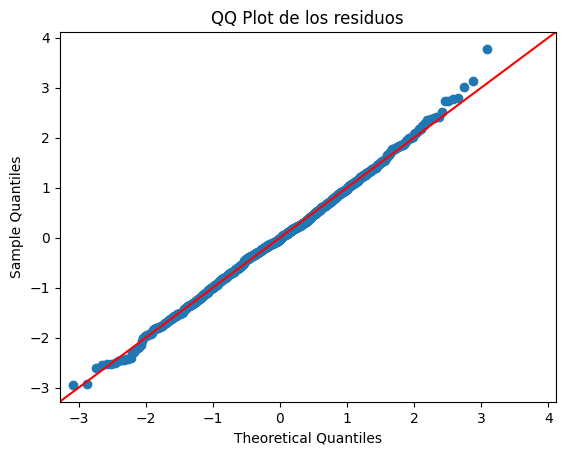

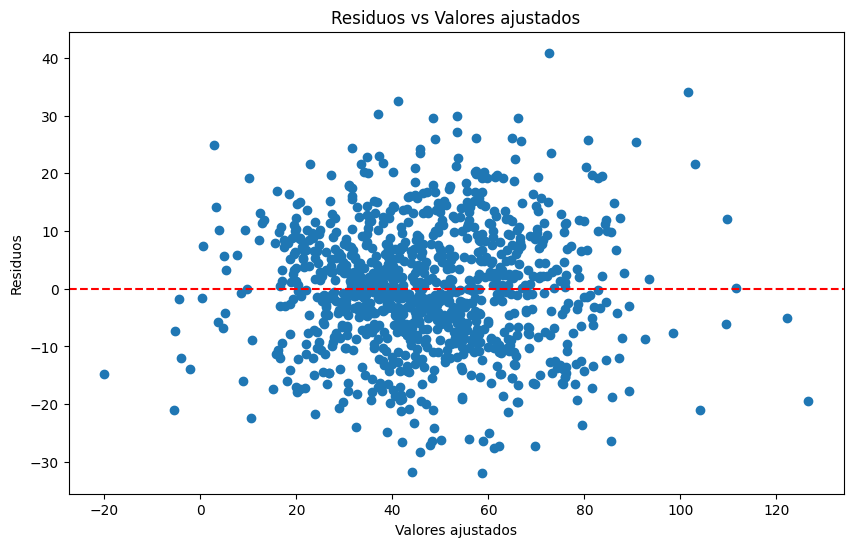

In [ ]:
# Residuals analysis for model validation

# Plotting residuals to check normality and homoscedasticity
residuals = model.resid

# QQ plot for normality check
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot de los residuos')
plt.show()

# Plot residuals vs fitted values to check for homoscedasticity
fitted_values = model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()


El análisis de los supuestos del modelo con interacción muestra lo siguiente:

Normalidad de los residuos:

El QQ plot indica que los residuos siguen aproximadamente una distribución normal, aunque hay algunos pequeños desvíos en los extremos. Sin embargo, en general, el supuesto de normalidad parece cumplirse.
Homoscedasticidad:

El gráfico de residuos vs valores ajustados muestra que los residuos se dispersan de manera razonablemente uniforme alrededor de 0, lo que indica que no hay una clara evidencia de heteroscedasticidad (variabilidad no constante de los residuos). Este es un buen indicio de que el supuesto de homoscedasticidad también se cumple.
En resumen, el modelo con interacción es más adecuado para capturar la relación entre Y, X, y Ind, y los supuestos del modelo se cumplen de manera razonable, lo que valida su uso.

¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo
propuesto

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create interaction term between X and Ind
data1['X_Ind'] = data1['X'] * data1['Ind']

# Define the regression formula with interaction term
formula = 'Y ~ X + Ind + X_Ind'

# Fit the model
model = smf.ols(formula=formula, data=data1).fit()

# Get the summary of the model to interpret the results
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.34e-312
Time:                        03:28:46   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4991      1.001     -0.498      0.618      -2.464       1.466
X              5.0411      0.093     53.997      0.000       4.858       5.224
Ind            4.5491      3.674      1.238      0.216      -2.661      11.759
X_Ind         -1.8466      0.353     -5.239      0.000      -2.538      -1.155
==============================================================================
Omnibus:                        4.301   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.811
Skew:                           0.065   Prob(JB):                       0.0902
Kurtosis:                       3.314   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo de regresión con interacciones presenta los siguientes resultados clave:

Coeficiente de X: 5.0411, con un valor p de 0.000, lo que indica que la variable
𝑋
X tiene un impacto significativo en la variable dependiente
𝑌
Y.
Coeficiente de Ind: 4.5491, con un valor p de 0.216, lo que sugiere que la variable categórica
𝐼
𝑛
𝑑
Ind por sí sola no tiene un impacto significativo en
𝑌
Y.
Coeficiente de interacción (X_Ind): -1.8466, con un valor p de 0.000, lo que indica que la interacción entre
𝑋
X y
𝐼
𝑛
𝑑
Ind es significativa, lo cual sugiere que el efecto de
𝑋
X en
𝑌
Y varía según el valor de
𝐼
𝑛
𝑑
Ind.
Interpretación:
El coeficiente de interacción negativo (-1.8466) implica que el efecto positivo de
𝑋
X sobre
𝑌
Y disminuye cuando
𝐼
𝑛
𝑑
Ind es 1, lo que sugiere que la relación entre
𝑋
X y
𝑌
Y cambia dependiendo de
𝐼
𝑛
𝑑
Ind.
El modelo tiene un R-cuadrado de 0.765, lo que significa que aproximadamente el 76.5% de la variabilidad de
𝑌
Y es explicada por este modelo, lo que indica un buen ajuste.
Validación de supuestos:
Omnibus test y Jarque-Bera test: ambos muestran valores no significativos, lo que indica que los residuos se distribuyen normalmente.
Durbin-Watson: El valor de 1.985 está cerca de 2, lo que sugiere que no hay autocorrelación en los residuos.
En resumen, un modelo con interacciones es adecuado, ya que la interacción entre
𝑋
X e
𝐼
𝑛
𝑑
Ind es significativa, y el modelo explica una buena parte de la variabilidad en
𝑌
Y.

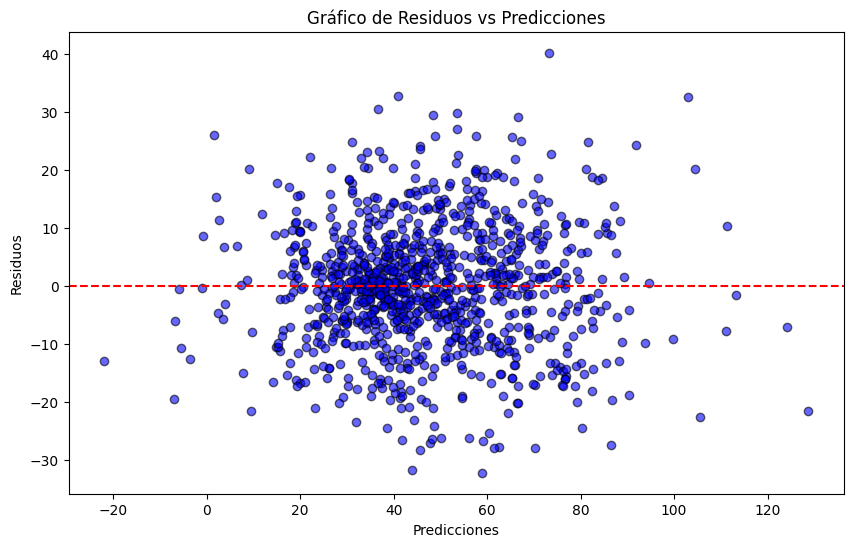

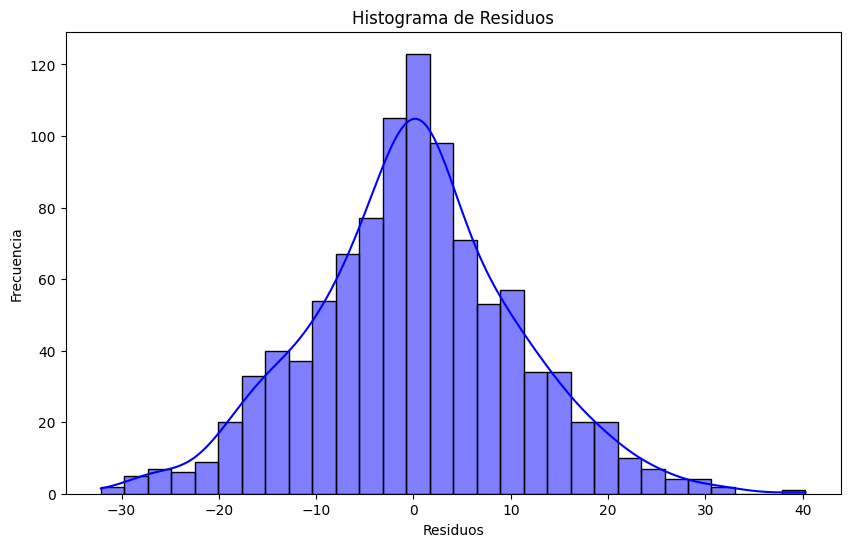

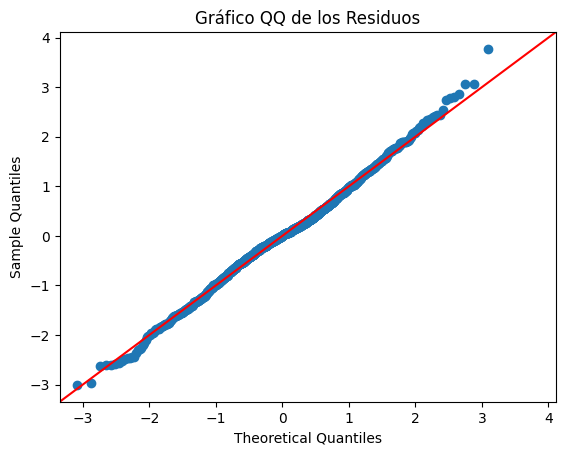

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones del modelo
predictions = model.fittedvalues

# Residuos del modelo
residuals = model.resid

# Crear una figura con tres subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Gráfico de residuos vs predicciones
axes[0].scatter(predictions, residuals, edgecolor='k', facecolor='blue', alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Gráfico de Residuos vs Predicciones')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Residuos')

# Histograma de residuos
sns.histplot(residuals, kde=True, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Histograma de Residuos')
axes[1].set_xlabel('Residuos')
axes[1].set_ylabel('Frecuencia')

# Gráfico QQ para la normalidad de los residuos
sm.qqplot(residuals, line='45', fit=True, ax=axes[2])
axes[2].set_title('Gráfico QQ de los Residuos')

plt.tight_layout()
plt.show()
